In [1]:
import pandas as pd 
import numpy as np
import yfinance
from IPython.display import HTML
import random
#from ipynb.fs.full.Functions1 import hide_toggle
#from operator import itemgetter 
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
#from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import pandas_datareader as pdr
import datetime as dt
import talib
from itertools import compress
#from ipynb.fs.full.Hide import hide_toggle # this function has to be in the same directory!
# pip install finta!!! the only site that has inverse fisher transform!

In [57]:
symbol ="GC=F"
num_name= symbol.split(' ') 
df = []
for i in num_name:
        ticker = yfinance.Ticker(i)
        data=ticker.history(interval='1d',start="2019-11-01",end="2021-01-01")
        data['Date'] = pd.to_datetime(data.index) # just to crate another column for date!!!
        data['Date'] = data['Date'].apply(mpl_dates.date2num)
        data = data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
        ohlc_data= data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']].values
        df.append(data)

df[0]

,Date,Open,High,Low,Close
Date,,,,,
2019-10-31,18200.0,1496.099976,1513.099976,1496.099976,1511.400024
2019-11-01,18201.0,1511.000000,1511.599976,1503.000000,1508.000000
2019-11-04,18204.0,1511.599976,1511.599976,1508.000000,1508.000000
2019-11-05,18205.0,1507.099976,1507.099976,1480.800049,1480.800049
2019-11-06,18206.0,1483.199951,1491.000000,1483.199951,1490.199951
...,...,...,...,...,...
2020-12-23,18619.0,1867.000000,1878.800049,1864.500000,1874.699951
2020-12-28,18624.0,1895.500000,1895.800049,1873.699951,1877.199951
2020-12-29,18625.0,1881.300049,1881.300049,1879.699951,1879.699951


In [58]:
df[0]['12EMA'] = talib.EMA(df[0]['Close'], timeperiod = 12)
df[0]['26EMA'] = talib.EMA(df[0]['Close'], timeperiod = 26)
#data_frames_separate[0][['Close','12EMA','26EMA']].plot(figsize=(12,10))
df[0]

,Date,Open,High,Low,Close,12EMA,26EMA
Date,,,,,,,
2019-10-31,18200.0,1496.099976,1513.099976,1496.099976,1511.400024,NaN,NaN
2019-11-01,18201.0,1511.000000,1511.599976,1503.000000,1508.000000,NaN,NaN
2019-11-04,18204.0,1511.599976,1511.599976,1508.000000,1508.000000,NaN,NaN
2019-11-05,18205.0,1507.099976,1507.099976,1480.800049,1480.800049,NaN,NaN
2019-11-06,18206.0,1483.199951,1491.000000,1483.199951,1490.199951,NaN,NaN
...,...,...,...,...,...,...,...
2020-12-23,18619.0,1867.000000,1878.800049,1864.500000,1874.699951,1862.706862,1860.242911
2020-12-28,18624.0,1895.500000,1895.800049,1873.699951,1877.199951,1864.936568,1861.498988
2020-12-29,18625.0,1881.300049,1881.300049,1879.699951,1879.699951,1867.207858,1862.847207


In [59]:
df[0]["MACDLine"]= df[0]['12EMA']-df[0]['26EMA']
df[0]['SignalLine'] = talib.EMA(df[0]["MACDLine"], timeperiod = 9)
df[0]['Histogram'] = df[0]["MACDLine"]- df[0]['SignalLine']
df[0]['BullishDivergence'] = 0.0
df[0]['BearishDivergence'] = 0.0

In [60]:
df[0]

,Date,Open,High,Low,Close,12EMA,26EMA,MACDLine,SignalLine,Histogram,BullishDivergence,BearishDivergence
Date,,,,,,,,,,,,
2019-10-31,18200.0,1496.099976,1513.099976,1496.099976,1511.400024,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2019-11-01,18201.0,1511.000000,1511.599976,1503.000000,1508.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2019-11-04,18204.0,1511.599976,1511.599976,1508.000000,1508.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2019-11-05,18205.0,1507.099976,1507.099976,1480.800049,1480.800049,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2019-11-06,18206.0,1483.199951,1491.000000,1483.199951,1490.199951,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,18619.0,1867.000000,1878.800049,1864.500000,1874.699951,1862.706862,1860.242911,2.463951,-3.669514,6.133465,0.0,0.0
2020-12-28,18624.0,1895.500000,1895.800049,1873.699951,1877.199951,1864.936568,1861.498988,3.437580,-2.248095,5.685675,0.0,0.0
2020-12-29,18625.0,1881.300049,1881.300049,1879.699951,1879.699951,1867.207858,1862.847207,4.360650,-0.926346,5.286996,0.0,0.0


In [61]:
# df[0]['Signal'] = 0.0
# df[0]['Signal'] = np.where(df[0]['MACDLine'] > df[0]['SignalLine'], 1.0, 0.0)
# df[0]['Position'] = df[0]['Signal'].diff()
# df[0]

In [62]:
lower_barrier = 0 # these are rules which can be modified according to ur rules!
upper_barrier = 0
width = 20
len(df[0]["Histogram"])


291

In [63]:
# Bullish Divergence
for i in range(len(df[0]['Histogram'])):
    try:
        if df[0]["Histogram"][i] < lower_barrier:
            
            for a in range(i + 1, i + width):
                if df[0]["Histogram"][a] > lower_barrier:
                    
                    for r in range(a + 1, a + width):
                        if df[0]["Histogram"][r] < lower_barrier and df[0]["Histogram"][r] > df[0]["Histogram"][i] and df[0]["Close"][r] < df[0]["Close"][i]:
                            #-----------------# I hope Data[r, 3]- refers to the close column(price)
                            for s in range(r + 1, r + width): 
                                if df[0]["Histogram"][s] > lower_barrier:
                                    df[0]["BullishDivergence"][s+1] = 1
                                    break
                                
                                else:
                                    continue
                        else:
                            continue
                    else:
                        continue
                else:
                    continue
                
    except IndexError:
        pass

In [64]:
for i in df[0]['BullishDivergence']:
    if i==1:
        print(i)

1.0
1.0
1.0
1.0
1.0


In [65]:
# Bearish Divergence
for i in range(len(df[0]['Histogram'])):
    
    try:
        if df[0]["Histogram"][i] > upper_barrier:
            
            for a in range(i + 1, i + width): 
                if df[0]["Histogram"][a] < upper_barrier:
                    
                    for r in range(a + 1, a + width):
                        if df[0]["Histogram"][r] > upper_barrier and df[0]["Histogram"][r] < df[0]["Histogram"][i] and df[0]["Close"][r] > df[0]["Close"][i]:
                            
                            for s in range(r + 1, r + width):
                                if df[0]["Histogram"][s] < upper_barrier:
                                    # do u need to have different columns! I think not but just to be on the same page!
                                    df[0]["BearishDivergence"][s+1] = -1
                                    break
                                else:
                                    continue
                        else:
                            continue
                    else:
                        continue
                else:
                    continue
    except IndexError:
        pass

In [66]:
for i in df[0]["BearishDivergence"]:
    if i == -1:
        print(i)

-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0


In [67]:
def plotMACDDivergence(num):
    
  fig = plt.figure(figsize=(16,12))
  gs = gridspec.GridSpec(2, 1, height_ratios = [1,1]) 
  ax_stock= plt.subplot(gs[0])    
  plt.title(num_name[num])

  candlestick_ohlc(ax_stock,df[num].values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

 # plot ‘buy’ signals
  plt.plot(df[num][df[num]['BullishDivergence'] == 1].index, 
         df[num]['Close'][df[num]['BullishDivergence'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
  plt.plot(df[num][df[num]['BearishDivergence'] == -1].index, 
         df[num]['Close'][df[num]['BearishDivergence'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
    
    
  ax_MACD= plt.subplot(gs[1],sharex=ax_stock)
 
  ax_MACD.plot(data.index,df[0]["MACDLine"] )
  ax_MACD.plot(data.index,df[0]["SignalLine"] )
  ax_MACD.plot(data.index,df[0]['Histogram'])
  plt.fill_between(data.index,df[0]['Histogram'])

  

  legend_labels= ["MACDLine", "SignalLine"]
# plot ‘buy’ signals
  plt.plot(df[num][df[num]['BullishDivergence'] == 1].index, 
         df[num]['Histogram'][df[num]['BullishDivergence'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
  plt.plot(df[num][df[num]['BearishDivergence'] == -1].index, 
         df[num]['Histogram'][df[num]['BearishDivergence'] == -1], 
         'v', markersize =15, color = 'r', label = 'sell')

    
    
  ax_MACD.legend(legend_labels,loc = 2)
    
  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax_MACD.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()
  fig.tight_layout()
  ax_stock.grid()
  #ax_rsi.grid()
# Removing the date labels and ticks from the price subplot:
  ax_stock.get_xaxis().set_visible(False)
# Removing the gap between the plots:
  fig.subplots_adjust(hspace=0)
# Adding a horizontal line at the zero level in the ROC subplot:
  ax_MACD.axhline(0, color = (.5, .5, .5), linestyle = '--', alpha = 0.5)
# We can add labels to both vertical axis:
  ax_stock.set_ylabel("Price ($)")
  ax_MACD.set_ylabel("MACD")


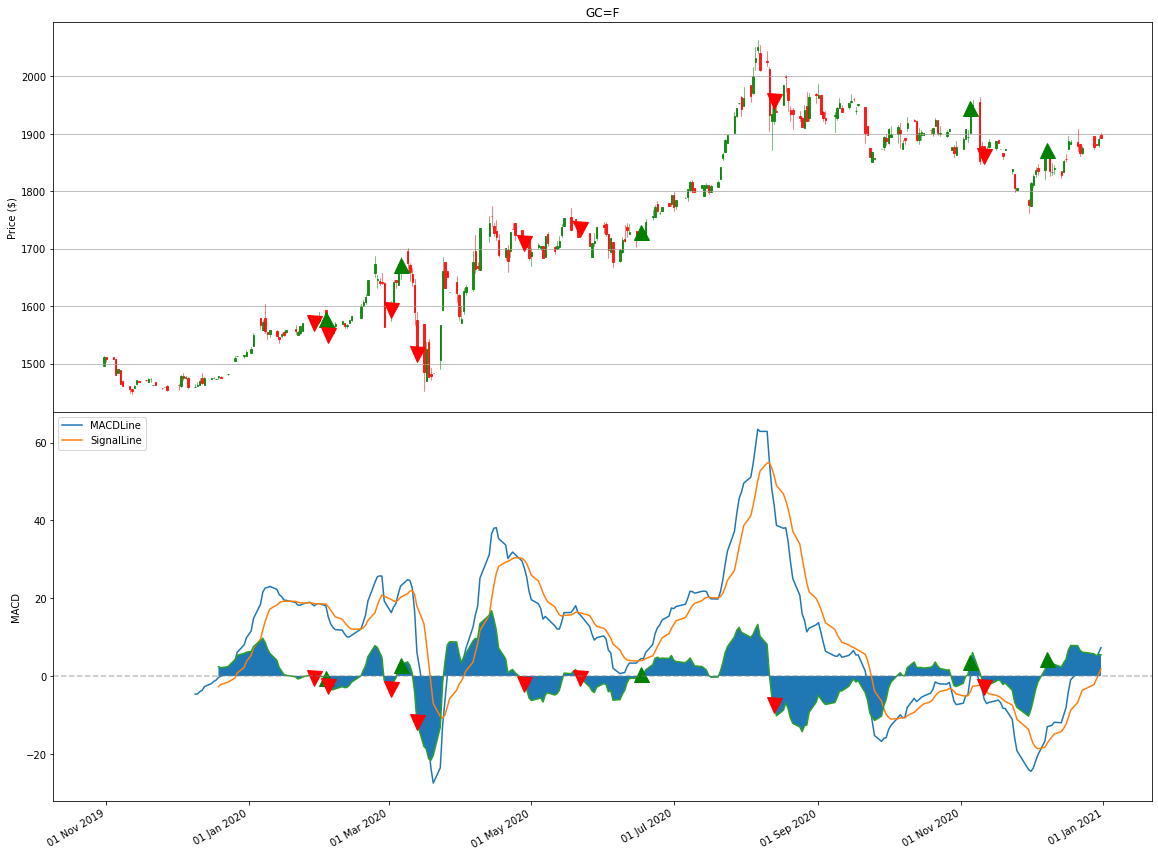

In [68]:
plotMACDDivergence(0)